# Import Libraries and Clean Data

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import plot_confusion_matrix, balanced_accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, plot_roc_curve, classification_report

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer

In [43]:
subreddits = pd.read_csv('./data/posts_combined_clean.csv')

In [44]:
subreddits.shape

(7976, 10)

# Decision Tree Model

### X, y, train test split

In [45]:
X = subreddits['title']
y = subreddits['subreddit']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

### Baseline Model

In [47]:
y.value_counts(normalize=True)

science       0.572091
technology    0.427909
Name: subreddit, dtype: float64

In [48]:
# the target in the dataset for posts was split approximately 57% for r/science.
# This will be the baseline model - if we guessed r/science each time we would 
# be correct 57% of the time

### AdaBoost Modeling

In [49]:
ada_pipe = make_pipeline(
    CountVectorizer(),
    StandardScaler(with_mean=False),
    AdaBoostClassifier(n_estimators= 1000),
)
ada_pipe.fit(X_train, y_train)
ada_pipe.score(X_train, y_train)

0.9851220327649616

In [50]:
ada_pipe.score(X_test, y_test)

0.8495486459378134

### AdaBoost Scoring

In [54]:
preds_ada = ada_pipe.predict(X_test)

In [55]:
precision_ada = precision_score(y_test, preds_ada, pos_label='science')
recall_ada = recall_score(y_test, preds_ada, pos_label='science')
f1_ada = 2 * (precision_ada * recall_ada) / (precision_ada + recall_ada)

In [56]:
print(f'The accuracy training score is    {ada_pipe.score(X_train, y_train)}')
print(f'The accuracy testing score is     {ada_pipe.score(X_test, y_test)}')
print(f'The bac score is                  {balanced_accuracy_score(y_test, ada_pipe.predict(X_test))}')
print(f'The f1_score score is             {f1_ada}')
print(f'The precision is                  {precision_ada}')
print(f'The recall is                     {recall_ada}')

The accuracy training score is    0.9851220327649616
The accuracy testing score is     0.8495486459378134
The bac score is                  0.8503647025171625
The f1_score score is             0.863013698630137
The precision is                  0.883177570093458
The recall is                     0.84375


- This model scored very well without any parameter tuning. It was overfit but had a high accuracy on the testing dataset at 0.85.

### GradientBoost Modeling

In [57]:
gboost_pipe = make_pipeline(
    CountVectorizer(),
    StandardScaler(with_mean=False),
    GradientBoostingClassifier(),
)
gboost_pipe.fit(X_train, y_train)
gboost_pipe.score(X_train, y_train)

0.824974924774323

In [58]:
gboost_pipe.score(X_test, y_test)

0.8059177532597793

In [59]:
balanced_accuracy_score(y_test, gboost_pipe.predict(X_test))

0.807881456358287

### Gradient Boost with GridSearch

In [60]:
gboost_params = {
    'gradientboostingclassifier__n_estimators': [1500, 2000, 3000, 5000]
}
gboost_grid = GridSearchCV(gboost_pipe, gboost_params)
gboost_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('standardscaler',
                                        StandardScaler(with_mean=False)),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             param_grid={'gradientboostingclassifier__n_estimators': [1500,
                                                                      2000,
                                                                      3000,
                                                                      5000]})

In [61]:
gboost_grid.best_params_

{'gradientboostingclassifier__n_estimators': 3000}

In [62]:
gboost_grid.score(X_train, y_train)

0.9958207957204949

In [63]:
gboost_grid.score(X_test, y_test)

0.8811434302908726

### Gradient Boost Model Score

In [64]:
preds_gboost = gboost_grid.predict(X_test)

In [65]:
precision_gboost = precision_score(y_test, preds_gboost, pos_label='science')
recall_gboost = recall_score(y_test, preds_gboost, pos_label='science')
f1_gboost = 2 * (precision_gboost * recall_gboost) / (precision_gboost + recall_gboost)

In [66]:
print(f'The accuracy training score is    {gboost_grid.score(X_train, y_train)}')
print(f'The accuracy testing score is     {gboost_grid.score(X_test, y_test)}')
print(f'The bac score is                  {balanced_accuracy_score(y_test, gboost_grid.predict(X_test))}')
print(f'The f1_score score is             {f1_gboost}')
print(f'The precision is                  {precision_gboost}')
print(f'The recall is                     {recall_gboost}')

The accuracy training score is    0.9958207957204949
The accuracy testing score is     0.8811434302908726
The bac score is                  0.8803745096436744
The f1_score score is             0.893387314439946
The precision is                  0.900271985494107
The recall is                     0.8866071428571428


### Gradient Boost - Best Model

In [68]:
gboost_pipe_2 = make_pipeline(
    CountVectorizer(),
    StandardScaler(with_mean=False),
    GradientBoostingClassifier(n_estimators = 5000),
)
gboost_pipe_2.fit(X_train, y_train)
gboost_pipe_2.score(X_train, y_train)

0.9984954864593781

In [69]:
preds_gboost_2 = gboost_pipe_2.predict(X_test)
precision_gboost_2 = precision_score(y_test, preds_gboost_2, pos_label='science')
recall_gboost_2 = recall_score(y_test, preds_gboost_2, pos_label='science')
f1_gboost_2 = 2 * (precision_gboost_2 * recall_gboost_2) / (precision_gboost_2 + recall_gboost_2)

In [70]:
print(f'The accuracy training score is    {gboost_pipe_2.score(X_train, y_train)}')
print(f'The accuracy testing score is     {gboost_pipe_2.score(X_test, y_test)}')
print(f'The bac score is                  {balanced_accuracy_score(y_test, gboost_pipe_2.predict(X_test))}')
print(f'The f1_score score is             {f1_gboost_2}')
print(f'The precision is                  {precision_gboost_2}')
print(f'The recall is                     {recall_gboost_2}')

The accuracy training score is    0.9984954864593781
The accuracy testing score is     0.8871614844533601
The bac score is                  0.8866112291598562
The f1_score score is             0.8986942818550202
The precision is                  0.9064486830154405
The recall is                     0.8910714285714286


- This model performed the best out of all the models tested. It had an accuracy on the testing dataset of 0.886, a balanced accuracy score of 0.885, and an f1 score of 0.898.
- It was slightly overfit but had the highest accuracy/balanced accuracy on the testing data.

### Confusion Matrix

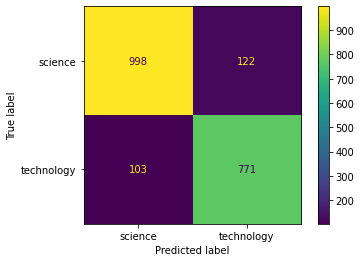

In [71]:
plot_confusion_matrix(gboost_pipe_2, X_test, y_test);

- This model had the least amount of false positives and false negatives

### ROC AUC

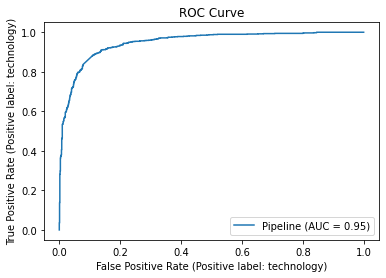

In [72]:
plot_roc_curve(gboost_pipe_2, X_test, y_test)
plt.title('ROC Curve');

In [73]:
roc_auc_score(y_test, probs[:, 1])

0.9490453375286042

- The ROC AUC score was 0.95, which indicates the ratio between the true positievs and the false positive rates fit the model well.

In [74]:
print(classification_report(y_test, preds_gboost_2))

              precision    recall  f1-score   support

     science       0.91      0.89      0.90      1120
  technology       0.86      0.88      0.87       874

    accuracy                           0.89      1994
   macro avg       0.88      0.89      0.89      1994
weighted avg       0.89      0.89      0.89      1994



### Feature Importance

In [75]:
gboost_pipe_2.named_steps

{'countvectorizer': CountVectorizer(),
 'standardscaler': StandardScaler(with_mean=False),
 'gradientboostingclassifier': GradientBoostingClassifier(n_estimators=5000)}

In [76]:
importance = gboost_pipe_2.named_steps['gradientboostingclassifier']
feature_importance = importance.feature_importances_

In [77]:
words = gboost_pipe_2.named_steps['countvectorizer'].get_feature_names()

In [78]:
importance_df = pd.DataFrame({'feature importance': feature_importance, 'word': words})
importance_df.nlargest(15, 'feature importance')

,feature importance,word
9437,0.113100,of
12913,0.041802,study
6926,0.022599,in
13447,0.021840,the
3399,0.020254,covid
13442,0.019431,that
1196,0.018825,apple
11927,0.016549,scientists
1186,0.014441,app
1060,0.013791,and


- The features with the highest weights in the model include words related to Covid-19, studies/scientits, and some tech-company names.